In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
df.shape

(150, 5)

In [6]:
X=df.drop('species', axis =1)

In [7]:
from scipy.cluster.hierarchy import linkage

In [9]:
hc_complete = linkage(X, 'complete')
hc_ward = linkage(X, 'ward')

In [10]:
from scipy.cluster.hierarchy import dendrogram

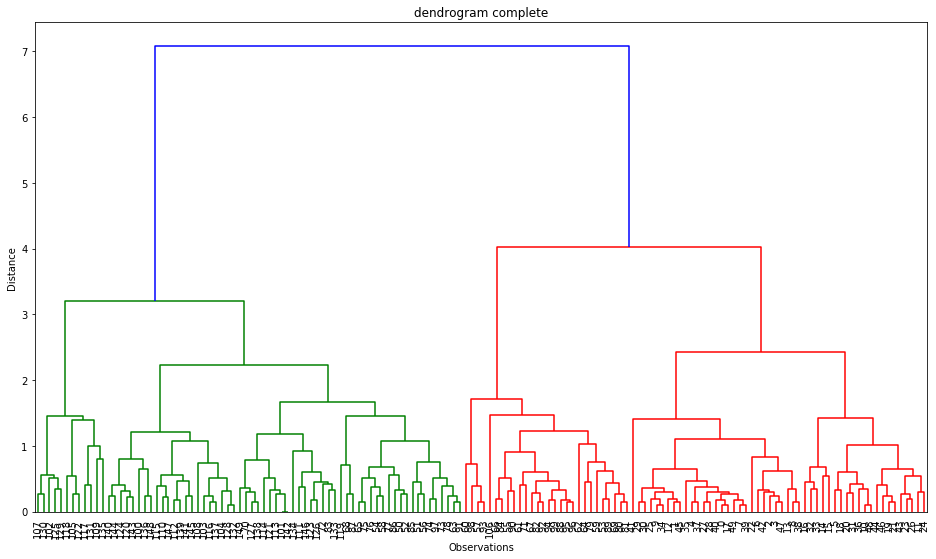

In [14]:
plt.figure(figsize = (16,9))
plt.title('dendrogram complete')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_complete, leaf_font_size = 10);

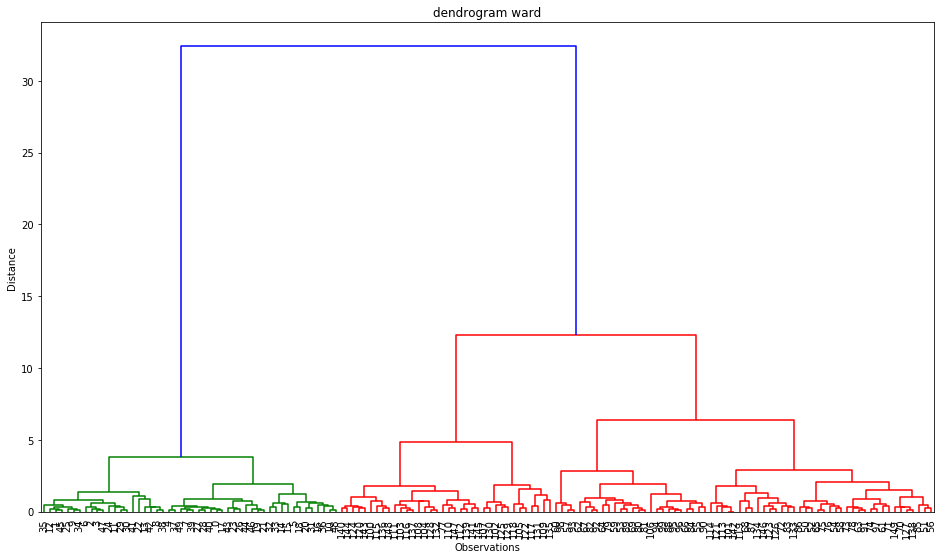

In [13]:
plt.figure(figsize = (16,9))
plt.title('dendrogram ward')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_ward, leaf_font_size = 10);

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
model = AgglomerativeClustering(n_clusters = 3, linkage = 'ward') # linkage default ward
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [17]:
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


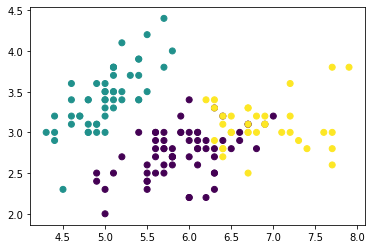

In [19]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=model.labels_, cmap = 'viridis');

In [20]:
clusters=model.labels_

In [21]:
df['predicted_clusters'] = clusters

In [25]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
51,6.4,3.2,4.5,1.5,versicolor,0
87,6.3,2.3,4.4,1.3,versicolor,0
128,6.4,2.8,5.6,2.1,virginica,2
54,6.5,2.8,4.6,1.5,versicolor,0
69,5.6,2.5,3.9,1.1,versicolor,0
68,6.2,2.2,4.5,1.5,versicolor,0
63,6.1,2.9,4.7,1.4,versicolor,0
82,5.8,2.7,3.9,1.2,versicolor,0
56,6.3,3.3,4.7,1.6,versicolor,0
129,7.2,3.0,5.8,1.6,virginica,2


In [27]:
#crosstab
ct = pd.crosstab(df.predicted_clusters, df.species)
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


species icin mapping yaparak cicek yerine numara atiyoruz

In [28]:
map_dict = {'virginica':2,
            'setosa': 1,
           'versicolor': 0}

In [29]:
df['original_classes']=df.species.map(map_dict)

In [32]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
78,6.0,2.9,4.5,1.5,versicolor,0,0
119,6.0,2.2,5.0,1.5,virginica,0,2
138,6.0,3.0,4.8,1.8,virginica,0,2
19,5.1,3.8,1.5,0.3,setosa,1,1
16,5.4,3.9,1.3,0.4,setosa,1,1
63,6.1,2.9,4.7,1.4,versicolor,0,0
122,7.7,2.8,6.7,2.0,virginica,2,2
128,6.4,2.8,5.6,2.1,virginica,2,2
84,5.4,3.0,4.5,1.5,versicolor,0,0
0,5.1,3.5,1.4,0.2,setosa,1,1


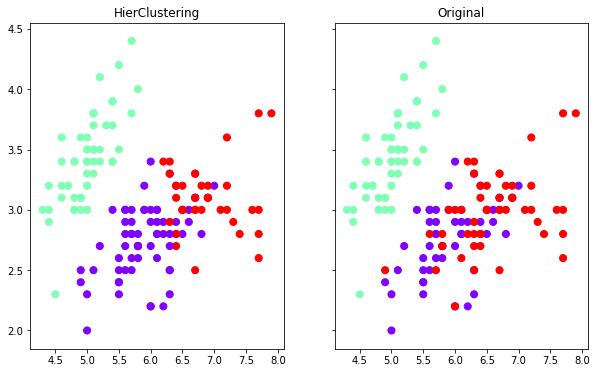

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('HierClustering')
ax1.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow")
ax2.set_title("Original")
ax2.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 50, cmap = "rainbow");

In [36]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [39]:
print(f'Silhouette Score(n=3): {silhouette_score(X, model.labels_)}')

Silhouette Score(n=3): 0.5543236611296426


In [40]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df['species'], df['predicted_clusters'])

0.7311985567707745

In [41]:
#ARI score'da gercek species oldugu icin karsilastiraabildik

In [42]:
# Silhoutte icin gercek sonuc(species) ile karsilastirma olmadan scoe uretilir